In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

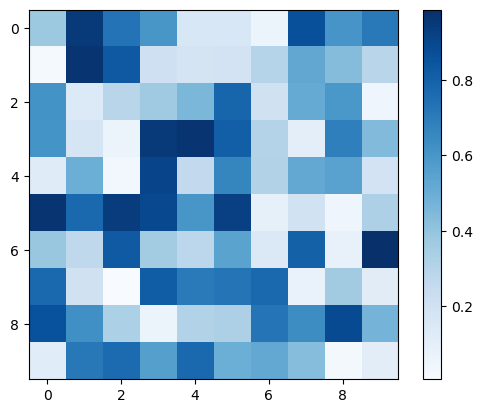

In [2]:
np.random.seed(42)

ot_shape = 10
ii = np.random.rand(ot_shape, ot_shape)

plt.imshow(ii, cmap = 'Blues')
plt.colorbar()

In [3]:
diag_ii = np.diag(ii)
argmax_ii = np.argmax(ii, axis=0) 
max_ii = np.max(ii, axis=0)

print(max_ii)
print(diag_ii)

print(argmax_ii) # 実際
print(np.arange(ot_shape)) # 正解

[0.96958463 0.96990985 0.93949894 0.94888554 0.96563203 0.92187424
 0.77127035 0.86617615 0.88721274 0.98688694]
[0.37454012 0.96990985 0.29214465 0.94888554 0.25877998 0.92187424
 0.14092422 0.07404465 0.88721274 0.10789143]
[5 1 5 3 3 5 7 0 8 6]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
# 武田さんのコード
def original(matrix, k, order="maximum", category_mat=None):
    # Get the diagonal elements
    if category_mat is None:
        diagonal = np.diag(matrix)
    else:
        category_mat = category_mat.values
        
        diagonal = []
        for i in range(matrix.shape[0]):
            category = category_mat[i]

            matching_rows = np.where(np.all(category_mat == category, axis=1))[0]
            matching_elements = matrix[i, matching_rows] # get the columns of which category are the same as i-th row

            diagonal.append(np.max(matching_elements))

    # Get the top k values for each row
    if order == "maximum":
        topk_values = np.partition(matrix, -k)[:, -k:]
    elif order == "minimum":
        topk_values = np.partition(matrix, k - 1)[:, :k]
    else:
        raise ValueError("Invalid order parameter. Must be 'maximum' or 'minimum'.")

    # Count the number of rows where the diagonal is in the top k values
    count = np.sum(np.isin(diagonal, topk_values))

    # Calculate the accuracy as the proportion of counts to the total number of rows
    accuracy = count / matrix.shape[0]
    accuracy *= 100

    return accuracy
    
# 修正後 
def revised(matrix, k, order="maximum", category_mat=None):    
    # Get the diagonal elements
    if category_mat is None:
        diagonal = np.diag(matrix)
    else:
        category_mat = category_mat.values
        
        diagonal = []
        for i in range(matrix.shape[0]):
            category = category_mat[i]

            matching_rows = np.where(np.all(category_mat == category, axis=1))[0]
            matching_elements = matrix[i, matching_rows]

            diagonal.append(np.min(matching_elements))

    # Get the top k values for each row
    if order == "maximum":
        idx = np.argpartition(matrix, -k, axis=0)[-k:, :]
        topk_values = np.take_along_axis(matrix, idx, axis=0)
    elif order == "minimum":
        idx = np.argpartition(matrix, k, axis=0)[:k, :]
        topk_values = np.take_along_axis(matrix, idx, axis=0)
        pass
    else:
        raise ValueError("Invalid order parameter. Must be 'maximum' or 'minimum'.")

    # Count the number of rows where the diagonal is in the top k values
    count = np.sum(np.isin(diagonal, topk_values))
    
    # Calculate the accuracy as the proportion of counts to the total number of rows
    accuracy = count / matrix.shape[0]
    accuracy *= 100

    return accuracy

print(original(ii, k=1))
print(revised(ii, k=1))

20.0
40.0


In [5]:
# diag = minの場合
# 武田さんに確認中・・・
diag_ii = np.diag(ii)
argmin_ii = np.argmin(ii, axis=0) 
min_ii = np.min(ii, axis=0)

print(min_ii)
print(diag_ii)

print(argmin_ii) # 実際
print(np.arange(ot_shape)) # 正解

print(original(ii, k=1, order='minimum'))
print(revised(ii, k=1, order='minimum'))

[0.02058449 0.13949386 0.00552212 0.06355835 0.15601864 0.15599452
 0.05808361 0.07404465 0.02541913 0.04645041]
[0.37454012 0.96990985 0.29214465 0.94888554 0.25877998 0.92187424
 0.14092422 0.07404465 0.88721274 0.10789143]
[1 2 7 8 0 0 0 7 9 2]
[0 1 2 3 4 5 6 7 8 9]
0.0
10.0
